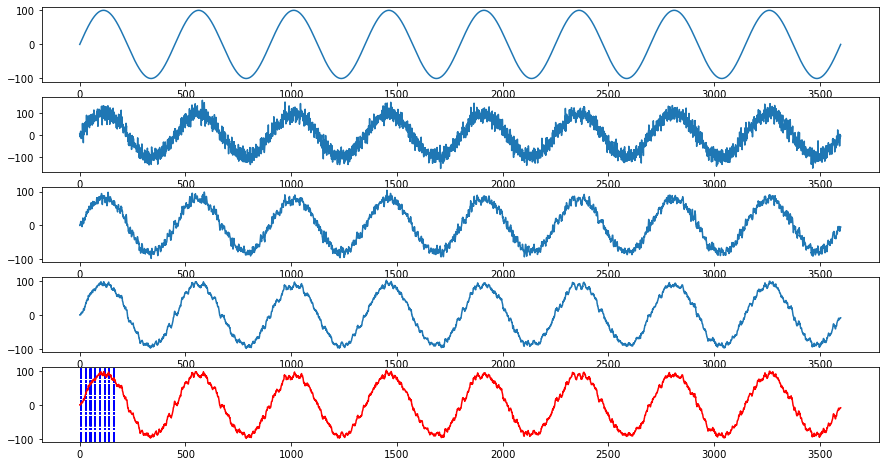

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fig, (a1,a2,a3,a4,a5) = plt.subplots(5,1, figsize=(15, 8))
x = np.linspace(0,180,3600)
f1 =100*np.sin(16*x/180*np.pi)
a1.plot(f1)

noise = 20 * np.random.randn(x.size)
y = f1 + noise
a2.plot(y)

y_smooth_5 = np.ones(x.size)
y_smooth_10 = np.ones(x.size)

for i in range(x.size):
    y_smooth_5[i] = (np.sum(y[i-2:i+2]))/5
    y_smooth_10[i] = (np.sum(y[i-5:i+5]))/11
a3.plot(y_smooth_5)
a4.plot(y_smooth_10)

threshhold = 40
peaks = []
for i in range(len(y_smooth_10)-1):
    if (y_smooth_10[i] > y_smooth_10[i+1]) and (y_smooth_10[i]>y_smooth_10[i-1]) and (y_smooth_10[i]>threshhold):
        if (y_smooth_10[i] > y_smooth_10[i-2]) and (y_smooth_10[i] > y_smooth_10[i+2]):
            peaks.append(i)

centroids = []
for i in peaks:
    half_max = y_smooth_10[i] / 2.
    xmin = (np.where(y_smooth_10[i::-1] < half_max)[0])[0]
    xmax = (np.where(y_smooth_10[i:] < half_max)[0])[0]
    x_range = x[i-xmin:i+xmax]
    I_range = y_smooth_10[i-xmin:i+xmax]
    x_range = np.array(x_range)
    I_range = np.array(I_range)
    xcm = np.sum((x_range*I_range)) / np.sum(I_range)
    centroids.append(xcm)
    
def plot_vert(x): 
    '''
    Just plots vertical lines, in blue dashes
    '''
    plt.axvline(x, color='blue', ls='-.')
    
for i in centroids[1:]:
    plot_vert(i) 
a5.plot(y_smooth_10, 'r', label='Spectrum')
